In [29]:
import numpy as np
import matplotlib.pyplot as plt

from eigenvalue_solver import compute_eigenvalues_eigenvectors, compute_eigenvalues, generate_symmetric
from feedforward_nn import NeuralNetwork
from gradient_descent import GradientDescent

import seaborn as sns

sns.set()

In [5]:
N = 6
A = generate_symmetric(N)

In [26]:
eta = 0.01
epochs = 1000
weight_scalings = [1, 2, 4, 8, 16, 32, 64, 128]

val, vec = np.linalg.eig(A)
print(val)
avg_diff = []
n_averages = 100
for scaling in weight_scalings:
    diff = []
    for i in range(n_averages):

        x0 = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
        #x0 = np.random.rand(1, N)
        x0 = x0 / np.linalg.norm(x0)

        # Run the computation
        nn = NeuralNetwork([N, 20, 20, N], activation="relu", cost_function="eigen", A=A)
        wb = nn.wb() / scaling
        gd = GradientDescent(mode="adam", momentum_param=0.5, store_extra=True)   
        wb = gd.train(x0, wb, x0, nn, eta, epochs)
        eigenvector_candidate = x0 + nn.predict(wb, x0)
        eigenvector = eigenvector_candidate / np.linalg.norm(eigenvector_candidate)
        eigenvalue = (eigenvector @ A @ eigenvector.T / (eigenvector @ eigenvector.T))[0, 0]

        diff.append(np.abs(eigenvalue - val[0]))
    
    print(f"Weight scaling: {scaling}")
    print(f"Average difference: {np.mean(diff)}")
    avg_diff.append(np.mean(diff))    

[ 2.46712105 -0.62729381  0.36335901 -0.12846239 -0.05515206  0.14425211]
Weight scaling: 1
Average difference: 2.3237665060035115
Weight scaling: 2
Average difference: 1.9299978669239595
Weight scaling: 4
Average difference: 0.025797830119130144
Weight scaling: 8
Average difference: 0.000487793578832707
Weight scaling: 16
Average difference: 0.0005368761061001903
Weight scaling: 32
Average difference: 0.0007839447353348072
Weight scaling: 64
Average difference: 0.0009120397874941011
Weight scaling: 128
Average difference: 0.0010216227706084879


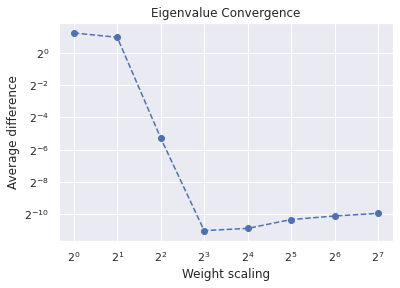

In [33]:

fig, ax = plt.subplots()
# set title
ax.set_title("Eigenvalue Convergence")

ax.set_xlabel("Weight scaling")
ax.set_ylabel("Average difference")

ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)


ax.plot(weight_scalings, avg_diff, linestyle='--', marker='o')
plt.savefig("Plots/weight_scaling_convergence.pdf")
plt.show()